Importando base de coordenadas CENSO 2022

In [ ]:
import basedosdados as bd
import pandas as pd

In [ ]:

query_cord = """
    SELECT *
    FROM `basedosdados.br_ibge_censo_2022.coordenada_endereco` 
    WHERE id_municipio IN ('1506807')
"""
df_coord = bd.read_sql(query_cord,
billing_project_id="extended-spark-302513")

Downloading: 100%|██████████| 146496/146496 [00:15<00:00, 9346.25rows/s]


In [ ]:
df_coord

,id_uf,id_municipio,especie_endereco,nivel_geo_coordenada,latitude,longitude,ponto
0,15,1506807,1,1,-2.435061,-54.720836,POINT(-54.720836 -2.435061)
1,15,1506807,1,1,-2.434332,-54.720000,POINT(-54.72 -2.434332)
2,15,1506807,1,1,-2.434763,-54.718722,POINT(-54.718722 -2.434763)
3,15,1506807,1,1,-2.437363,-54.717541,POINT(-54.717541 -2.437363)
4,15,1506807,1,1,-2.438072,-54.716247,POINT(-54.716247 -2.438072)
...,...,...,...,...,...,...,...
146491,15,1506807,8,1,-2.574829,-54.637610,POINT(-54.63761 -2.574829)
146492,15,1506807,8,1,-2.389323,-54.570533,POINT(-54.570533 -2.389323)
146493,15,1506807,8,1,-2.449664,-54.763298,POINT(-54.763298 -2.449664)
146494,15,1506807,8,1,-2.901309,-54.160323,POINT(-54.160323 -2.901309)


Importando a base de diconario

In [ ]:
query_dict = """
    SELECT *
    FROM `basedosdados.br_ibge_censo_2022.dicionario`
"""
df_dict = bd.read_sql(query_dict, 
billing_project_id="extended-spark-302513")



Downloading: 100%|██████████| 14/14 [00:00<00:00, 37.37rows/s]


In [ ]:
len(df_dict)

14

In [ ]:
values = df_dict['valor']
values

0                                  Domicílio particular
1                 Estabelecimento de outras finalidades
2                              Estabelecimento de saúde
3                                    Domicílio coletivo
4                          Estabelecimento agropecuário
5                              Edificação em construção
6                             Estabelecimento de ensino
7                             Estabelecimento religioso
8                                        Face de quadra
9          Endereço - coordenada original do Censo 2022
10                                     Setor censitário
11    Endereço - coordenada modificada (apartamentos...
12    Endereço - coordenada estimada (endereços orig...
13                                           Localidade
Name: valor, dtype: object

In [ ]:
df_filtrado = df_coord[df_coord['especie_endereco'].isin(['6', '7'])]
df_filtrado

,id_uf,id_municipio,especie_endereco,nivel_geo_coordenada,latitude,longitude,ponto
121834,15,1506807,6,1,-2.435714,-54.720290,POINT(-54.72029 -2.435714)
121835,15,1506807,6,1,-2.439201,-54.725989,POINT(-54.725989 -2.439201)
121836,15,1506807,6,1,-2.439152,-54.724718,POINT(-54.724718 -2.439152)
121837,15,1506807,6,1,-2.441055,-54.725385,POINT(-54.725385 -2.441055)
121838,15,1506807,6,1,-2.440555,-54.723278,POINT(-54.723278 -2.440555)
...,...,...,...,...,...,...,...
145481,15,1506807,7,1,-2.306683,-55.560926,POINT(-55.560926 -2.306683)
145482,15,1506807,7,1,-2.311428,-55.564434,POINT(-55.564434 -2.311428)
145483,15,1506807,7,1,-2.185854,-55.589816,POINT(-55.589816 -2.185854)
145484,15,1506807,7,1,-2.271707,-55.262753,POINT(-55.262753 -2.271707)


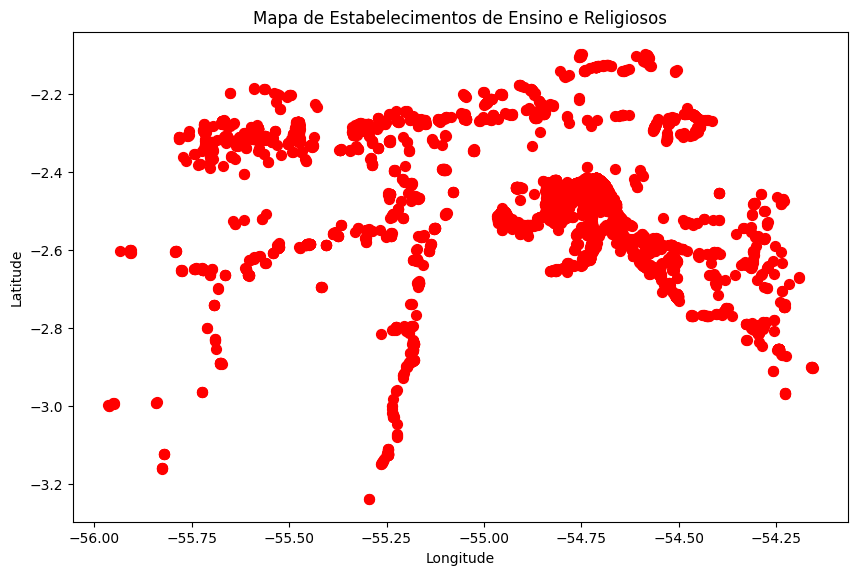

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.wkt import loads
from shapely.geometry import Point

# Supondo que df_coord seja o seu DataFrame
# e df_especies seja o DataFrame de espécies (6 e 7)

df_filtrado = df_coord[df_coord['especie_endereco'].isin(['6', '7'])]

# Criar uma coluna 'geometry' com objetos Point
df_filtrado['geometry'] = [Point(lon, lat) for lon, lat in zip(df_filtrado['longitude'], df_filtrado['latitude'])]

# Criar um GeoDataFrame a partir do DataFrame filtrado
gdf = gpd.GeoDataFrame(df_filtrado, geometry='geometry')

# Plotar o mapa
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, marker='o', color='red', markersize=50)
plt.title('Mapa de Estabelecimentos de Ensino e Religiosos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000017EC0241590>